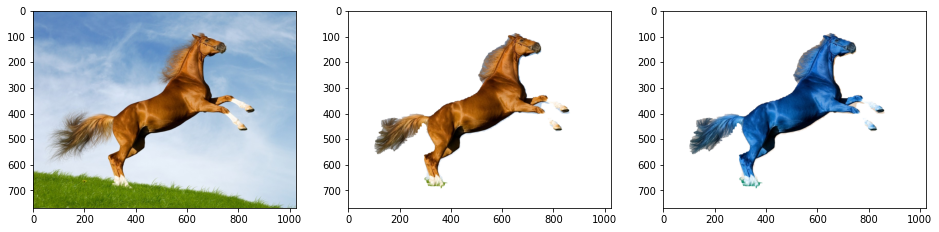

In [26]:
#Podemos usar a cvzone biblioteca para remover o fundo de uma imagem 
#que usa a mediapipe biblioteca para remover o fundo
import cv2
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

segmentor = SelfiSegmentation()

#Abrindo a imagem por meio da biblioteca cv2
#img = cv2.imread('ex_blend1.jpg')
img = np.array(Image.open('ex_blend1.jpg'))


def RGB_to_BGR(img_np):
    (l, c, p) = img_np.shape

    img_bgr = np.zeros(shape=(l, c, p), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            r = img_np[i, j, 0]
            g = img_np[i, j, 1]
            b = img_np[i, j, 2]
        
            img_bgr[i, j, 0] = b
            img_bgr[i, j, 1] = g
            img_bgr[i, j, 2] = r
     
    return img_bgr

img_bgr = RGB_to_BGR(img)

#Porém, converteu-se em RGB usando uma função do cv2
#img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#Listando os argumentos da função removeBG
# 1º) imagem de entrada; 
# 2º) cor que queremos usar como a nova cor de fundo.
# 3º) limite que podemos definir de acordo com nossa imagem fornecida 
img_Out = segmentor.removeBG(img_bgr, (255,255,255), threshold=0.29)

#Mostrando o resultado da subtração
plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(img)

#Obs: Deve-se converter a img_Out para RGB
#img_rgb = cv2.cvtColor(img_Out, cv2.COLOR_BGR2RGB)

#Em vez de fazer a conversão pela função,
#realizou-se por meio do numpy
def BGR_to_RGB(img_np):
    (l, c, p) = img_np.shape

    img_rgb = np.zeros(shape=(l, c, p), dtype=np.uint8)
    for i in range(l):
        for j in range(c):
            b = img_np[i, j, 0]
            g = img_np[i, j, 1]
            r = img_np[i, j, 2]
        
            img_rgb[i, j, 0] = r
            img_rgb[i, j, 1] = g
            img_rgb[i, j, 2] = b
     
    return img_rgb

plt.subplot(1, 3, 2)
img_rgb = BGR_to_RGB(img_Out)
plt.imshow(img_rgb)

#Caso não seja convertida a imagem ficará em BGR
plt.subplot(1, 3, 3)
plt.imshow(img_Out)

#Caso não se utilize o plt.imshow, a função cv2.imshow faz a conversão automaticamente
#cv2.imshow('img',img_Out)